In [2]:
import matplotlib.pyplot as plt
from neuron import Neuron
import numpy as np

In [67]:
def drawneuron(id, ax):
    drawneuronswc(f"../datasets/IARPA/swc/{id}.swc", ax)

def drawneuronswc(swc_path, ax):
    neuron = Neuron()
    neuron.load_eswc(swc_path)
    
    if len(neuron.roots) > 1:
        print(f"Warning: {swc_path} has multiple roots, use the first 1 as center")
    center = np.array(neuron.vertices[neuron.roots[0]].coord)

    coords = np.ndarray((len(neuron.vertices), 3))
    for i, v in enumerate(neuron.vertices):
        coords[i, :] = v.coord - center

    ax.scatter(coords[:,0], coords[:,1], coords[:,2], edgecolors='None', marker='.')
    ax.set_xlabel("μm")
    ax.set_ylabel("μm")
    ax.set_zlabel("μm")
    
def loadneuron(swc_path):
    neuron = Neuron()
    neuron.load_eswc(swc_path)
    
    if len(neuron.roots) > 1:
        print(f"Warning: {swc_path} has multiple roots, use the first 1 as center")
    center = np.array(neuron.vertices[neuron.roots[0]].coord)

    coords = np.ndarray((len(neuron.vertices), 3))
    for i, v in enumerate(neuron.vertices):
        coords[i, :] = v.coord - center
    return coords
    
def drawpointcloud(coords, ax):
    mi = np.min(coords)
    ma = np.max(coords)
    ax.set(xlim=(mi, ma), ylim=(mi, ma))
    ax.axis("off")
    #ax.plot(coords[:,0], coords[:,1], color="black")
    ax.scatter(coords[:,0], coords[:,1], edgecolors='None', marker='.', linewidths=0.5, c="black")

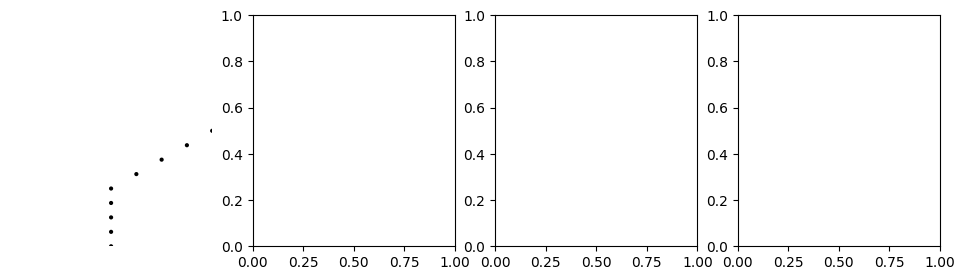

In [68]:
def euclidean_distance(tree1, tree2):
    if tree1.shape[0] != tree2.shape[0]:
        raise Exception("Trees need to have equal amount of points")
    dist = 0
    for p1, p2 in zip(tree1, tree2):
        dist += np.norm(p1, p2)
        
tree1 = np.array([[4, 0], 
                 [4, 0.5], 
                 [4, 1], 
                 [4, 1.5], 
                 [4, 2], 
                 [5, 2.5], 
                 [6, 3], 
                 [7, 3.5], 
                 [8, 4]], dtype=float)


        
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
drawpointcloud(tree1, ax[0])
plt.show()